# Q.3

# BANK MARKETING

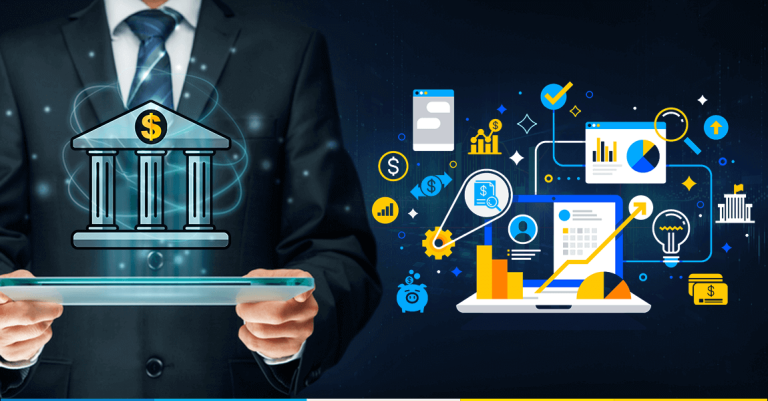

In [365]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [366]:
bank = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [367]:
bank.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [368]:
bank.shape

(31647, 18)

In [369]:
bank.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [370]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [371]:
categorical = ['job', 'marital','education','default','housing','loan','contact','month','poutcome']
numerical = [x for x in bank.columns.to_list() if x not in categorical]
numerical.remove('subscribed')

In [372]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

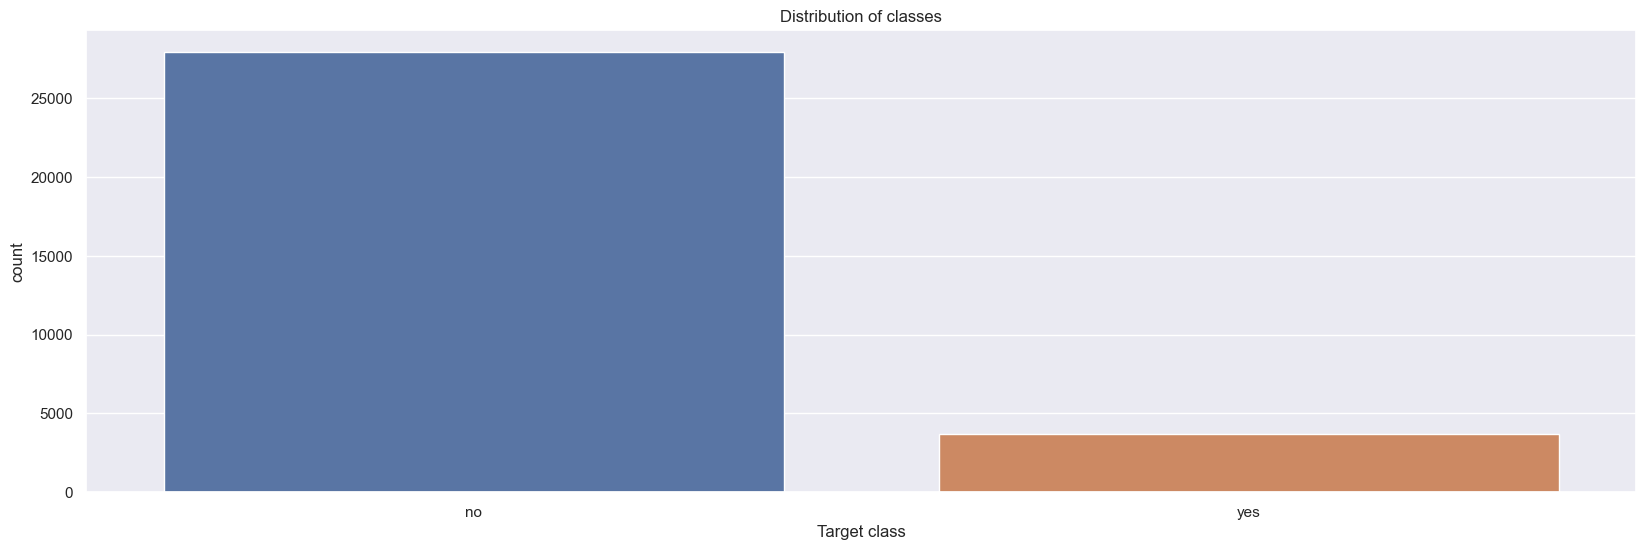

In [373]:
from matplotlib import pyplot as plt
sns.countplot(x=bank['subscribed'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [374]:
bank.subscribed.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

# Data Analysis

Text(0.5, 0, 'y: target variable')

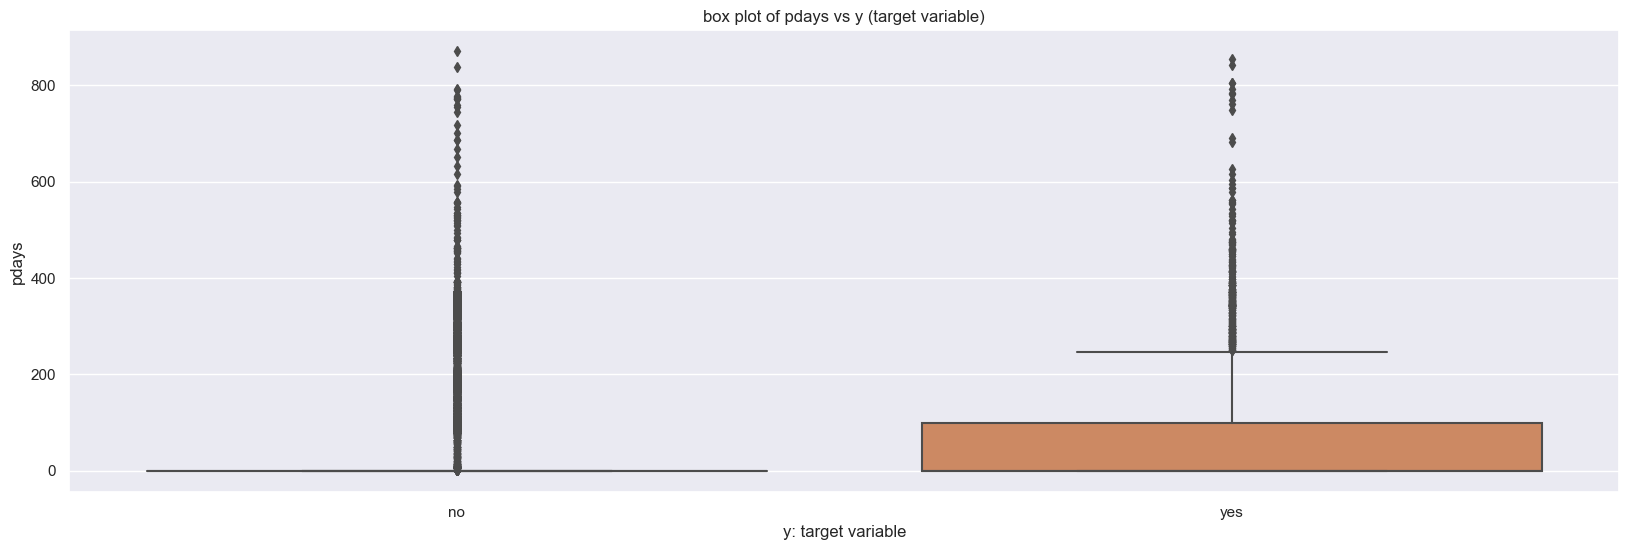

In [375]:
sns.boxplot (y = bank['pdays'], x= bank['subscribed'])
plt.title('box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

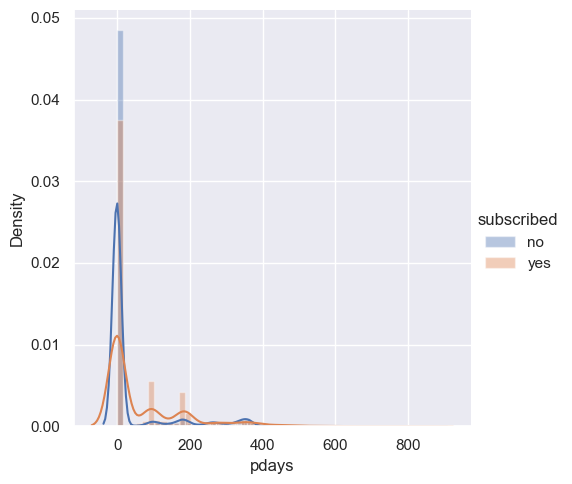

In [376]:
sns.FacetGrid(bank, hue ='subscribed', size=5)\
.map(sns.distplot, 'pdays')\
.add_legend()

In [377]:
bank.pdays.describe()

count    31647.000000
mean        39.576042
std         99.317592
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [378]:
for x in range(95, 101, 1):
    print("{}% of pdays are less than equal to {}".format(x,bank.pdays.quantile(x/100)))
    iqr = bank.pdays.quantile(0.75) - bank.pdays.quantile(0.25)
    print('IQR{}'.format(iqr))

95% of pdays are less than equal to 313.0
IQR0.0
96% of pdays are less than equal to 336.0
IQR0.0
97% of pdays are less than equal to 348.0
IQR0.0
98% of pdays are less than equal to 358.0
IQR0.0
99% of pdays are less than equal to 370.0
IQR0.0
100% of pdays are less than equal to 871.0
IQR0.0


# duration

Text(0.5, 0, 'y:target variable')

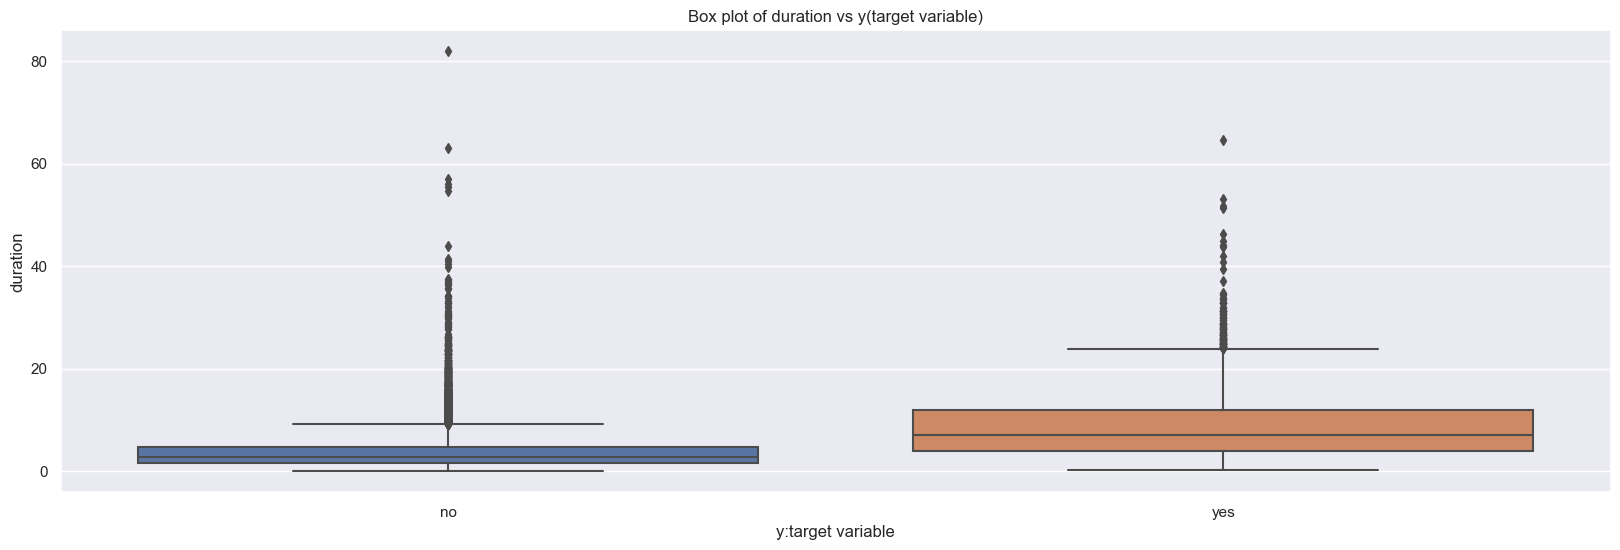

In [379]:
bank['duration'] = bank['duration']/60
sns.boxplot(y=bank['duration'], x=bank['subscribed'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of duration for target variale y')

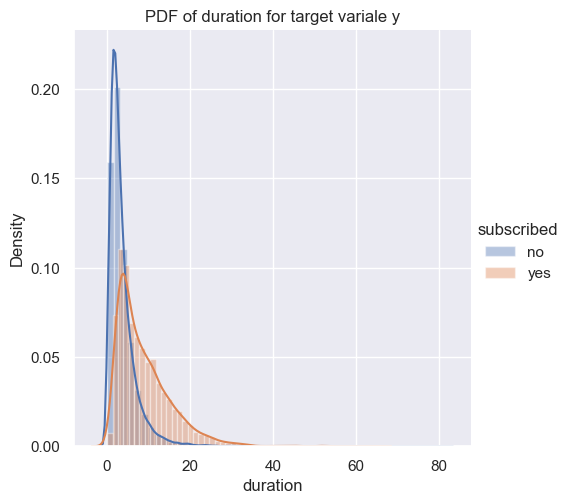

In [380]:
sns.FacetGrid(bank, hue='subscribed', size=5)\
.map(sns.distplot, 'duration')\
.add_legend()
plt.title('PDF of duration for target variale y')

In [381]:
bank.duration.describe()

count    31647.000000
mean         4.301892
std          4.285316
min          0.000000
25%          1.733333
50%          3.000000
75%          5.308333
max         81.966667
Name: duration, dtype: float64

In [382]:
for x in range(95, 101, 1):
    print("{}% of call have duration are less than equal to {}".format(x,bank.duration.quantile(x/100)))
iqr = bank.duration.quantile(0.75) - bank.duration.quantile(0.25)
print('IQR{}'.format(iqr))

95% of call have duration are less than equal to 12.533333333333333
96% of call have duration are less than equal to 13.716666666666667
97% of call have duration are less than equal to 15.183333333333334
98% of call have duration are less than equal to 17.433333333333334
99% of call have duration are less than equal to 20.983333333333334
100% of call have duration are less than equal to 81.96666666666667
IQR3.575


In [383]:
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))

NameError: name 'data' is not defined

# previous

Text(0.5, 0, 'y: target variable')

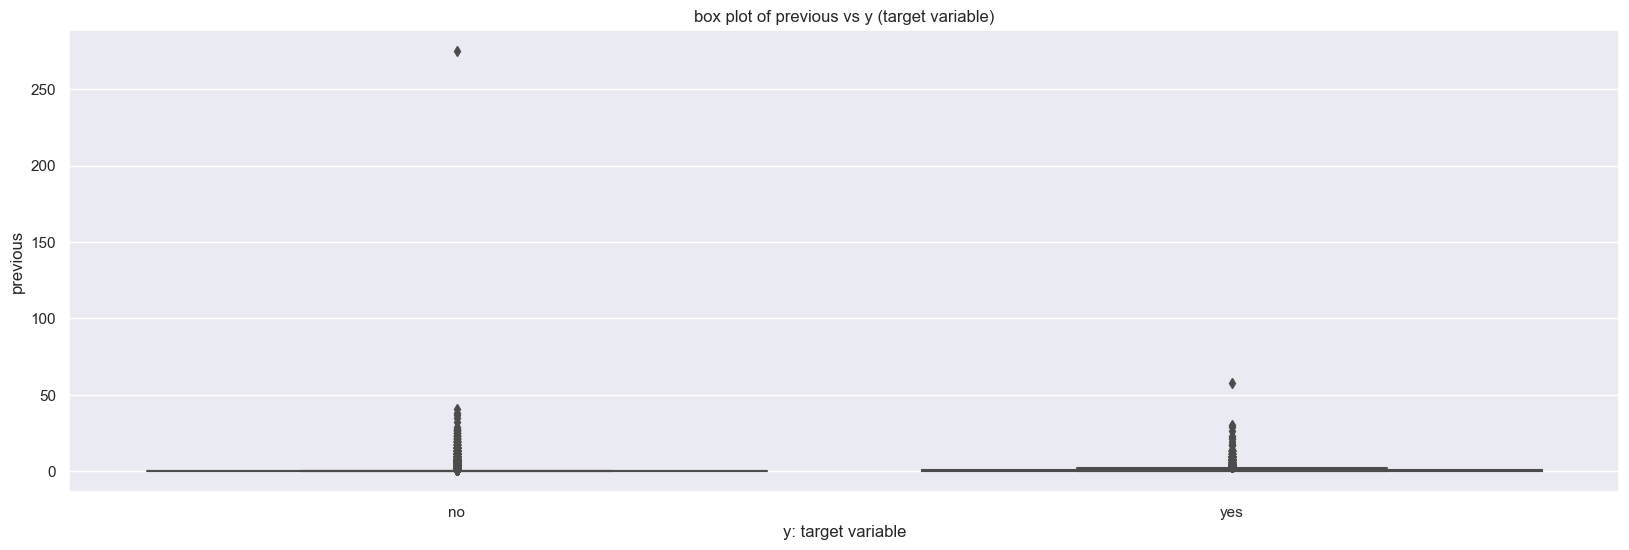

In [384]:
sns.boxplot (y = bank['previous'], x= bank['subscribed'])
plt.title('box plot of previous vs y (target variable)')
plt.xlabel('y: target variable')

Text(0.5, 1.0, 'PDF of duration for target variale y')

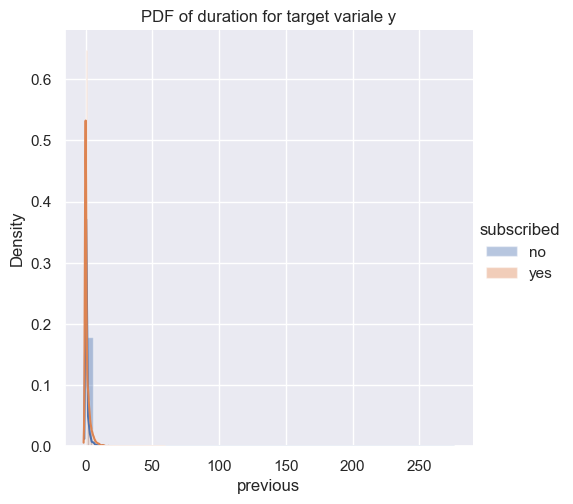

In [385]:
sns.FacetGrid(bank, hue='subscribed', size=5)\
.map(sns.distplot, 'previous')\
.add_legend()
plt.title('PDF of duration for target variale y')

In [386]:
bank.previous.describe()

count    31647.000000
mean         0.574272
std          2.422529
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [387]:
for x in range(95, 101, 1):
    print("{}% of previous values are less than equal to {}".format(x,bank.previous.quantile(x/100)))
iqr = bank.previous.quantile(0.75) - bank.previous.quantile(0.25)
print('IQR{}'.format(iqr))

95% of previous values are less than equal to 3.0
96% of previous values are less than equal to 4.0
97% of previous values are less than equal to 5.0
98% of previous values are less than equal to 6.0
99% of previous values are less than equal to 9.0
100% of previous values are less than equal to 275.0
IQR0.0

















# Age

Text(0.5, 0, 'y: target variable')

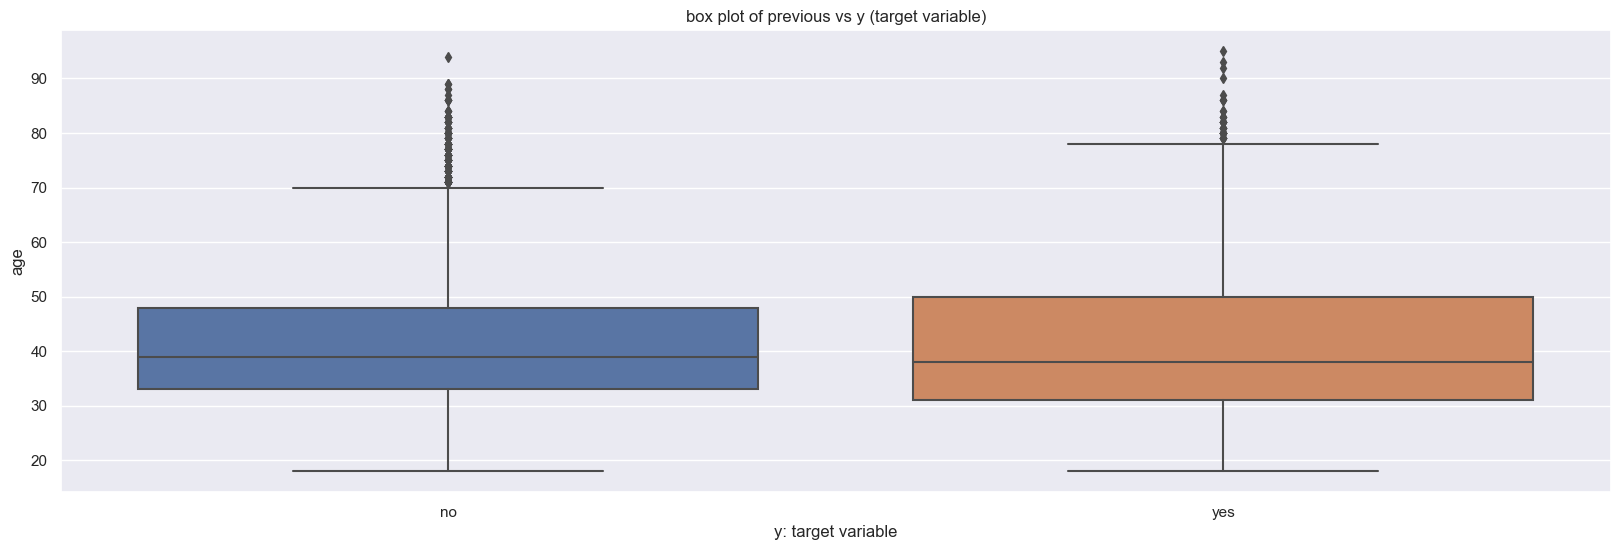

In [388]:
sns.boxplot (y = bank['age'], x= bank['subscribed'])
plt.title('box plot of previous vs y (target variable)')
plt.xlabel('y: target variable')

Text(0.5, 1.0, 'PDF of duration for target variale y')

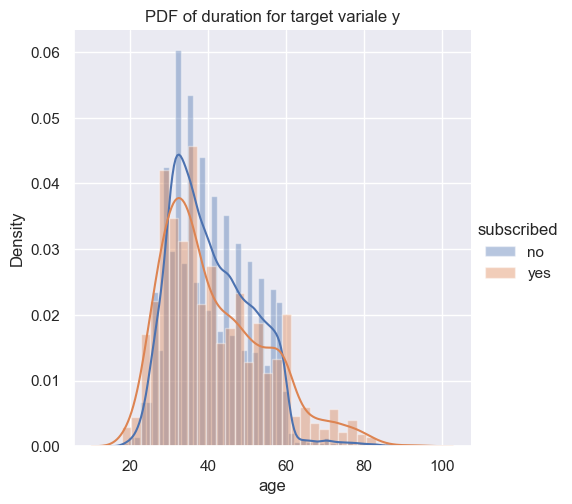

In [389]:
sns.FacetGrid(bank, hue='subscribed', size=5)\
.map(sns.distplot, 'age')\
.add_legend()
plt.title('PDF of duration for target variale y')

In [390]:
bank.age.describe()

count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [391]:
for x in range(95, 101, 1):
    print("{}% of people having age are less than equal to {}".format(x,bank.age.quantile(x/100)))
iqr = bank.age.quantile(0.75) - bank.age.quantile(0.25)
print('IQR{}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR15.0


In [392]:
lst =[bank]
for column in lst:
    column.loc[column["age"]<30, 'age_group'] = 30
    column.loc[(column["age"] >=30) & (column["age"] <=44), 'age_group'] = 40
    column.loc[(column["age"] >=45) & (column["age"] <=59), 'age_group'] = 50
    column.loc[column["age"]<30, 'age_group'] = 30

In [393]:
count_age_response_pct = pd.crosstab(bank['subscribed'],bank['age_group']).apply(lambda x: x/x.sum()*100)
count_age_response_pct = count_age_response_pct.transpose()

<AxesSubplot:xlabel='age_group', ylabel='count'>

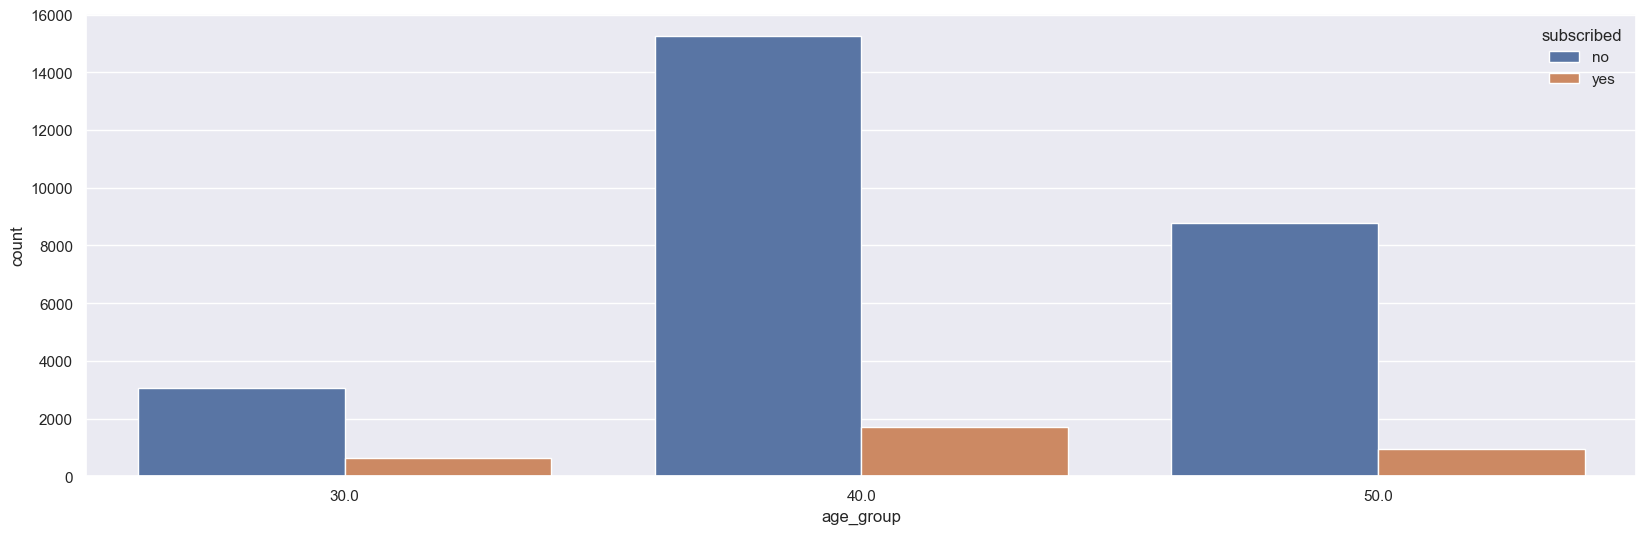

In [394]:
sns.countplot(x = 'age_group', data = bank, hue = 'subscribed')

In [395]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 30]), bank[bank['age_group'] == 30].subscribed.value_counts()[1]/len(bank[bank['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 40]), bank[bank['age_group'] == 40].subscribed.value_counts()[1]/len(bank[bank['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 50]), bank[bank['age_group'] == 50].subscribed.value_counts()[1]/len(bank[bank['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 60]), bank[bank['age_group'] == 60].subscribed.value_counts()[1]/len(bank[bank['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 3695, Success rate: 0.17510148849797022
Clients of age 30-45 contacted: 16973, Success rate: 0.10145525245978908
Clients of age 40-60 contacted: 9734, Success rate: 0.09656872816930347


IndexError: index 1 is out of bounds for axis 0 with size 0

# jobs

In [396]:
bank.job.value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

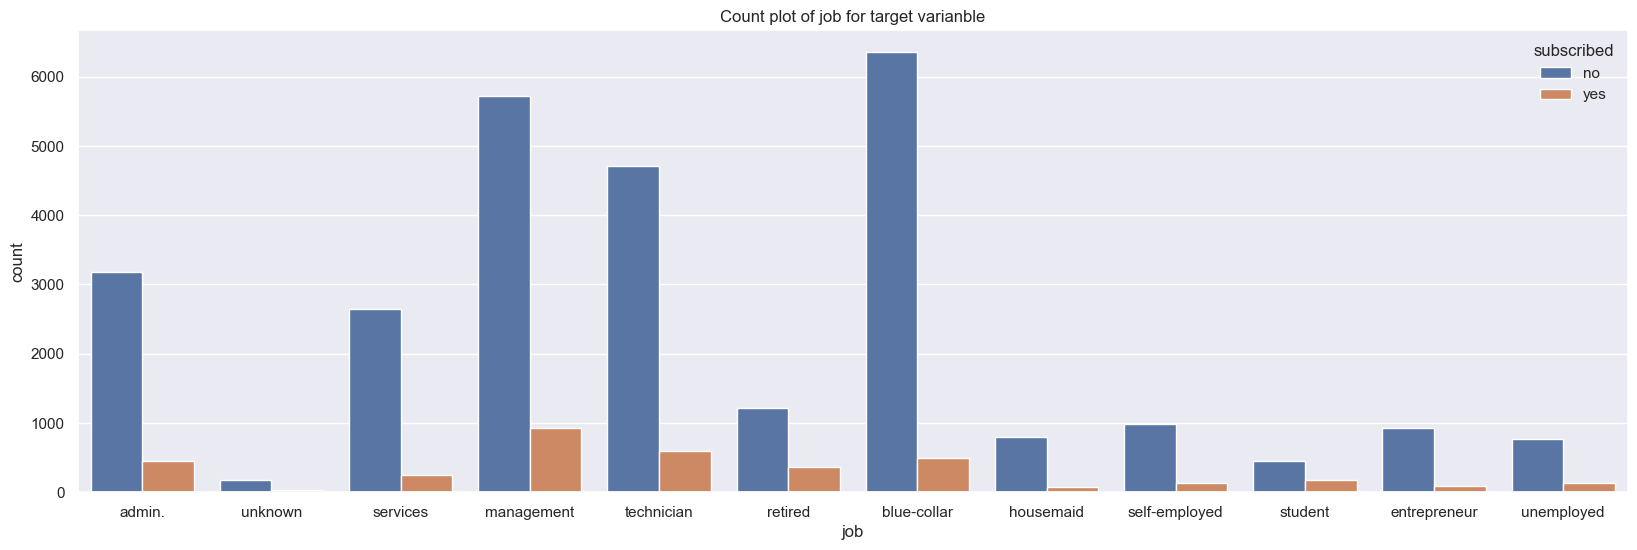

In [397]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=bank['job'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Poutcome

In [400]:
bank.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

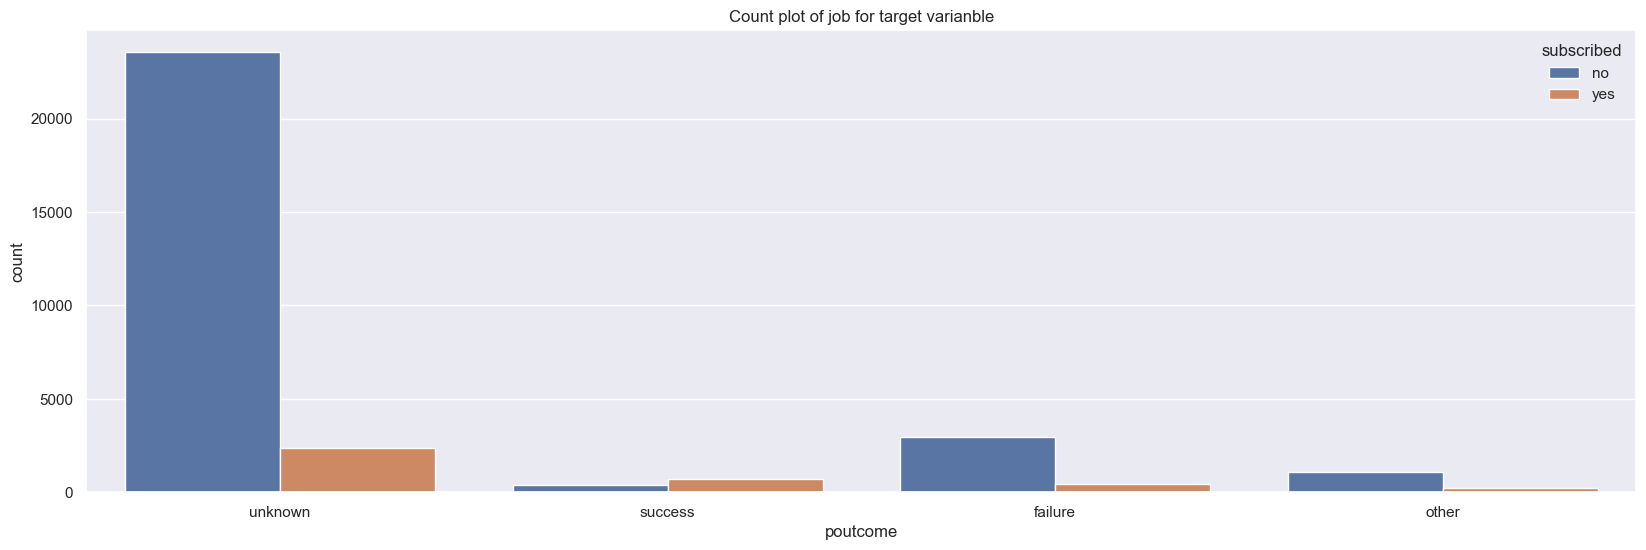

In [401]:
sns.countplot(x=bank['poutcome'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Education

In [402]:
bank.education.value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

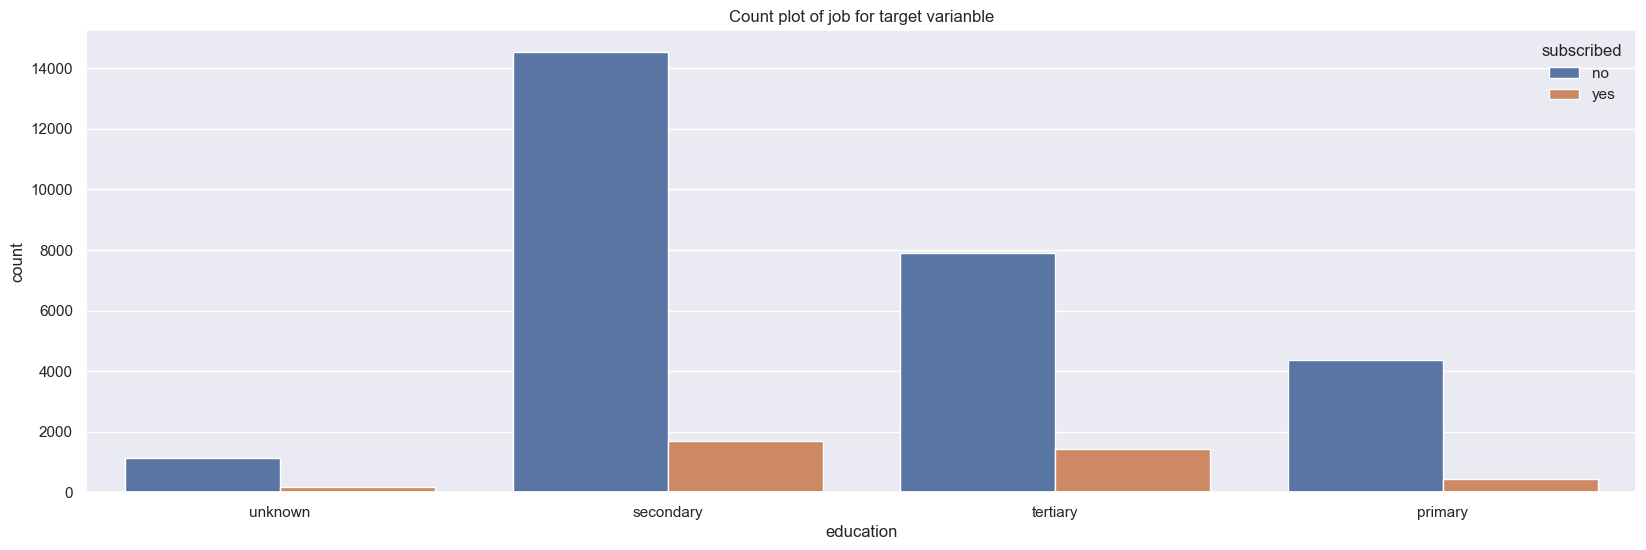

In [403]:
sns.countplot(x=bank['education'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Defaut

In [404]:
bank.default.value_counts()

no     31062
yes      585
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

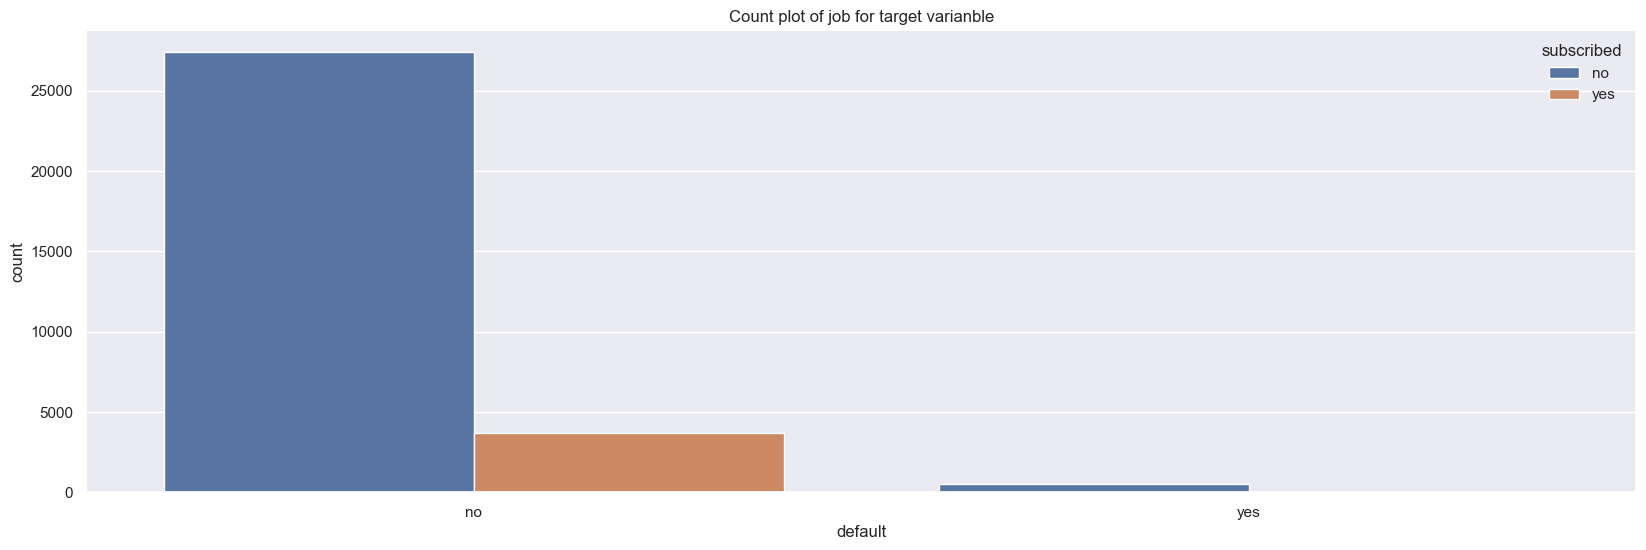

In [405]:
sns.countplot(x=bank['default'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

In [406]:
bank[bank['default']== 'yes'].subscribed.count()

585

# loan

In [407]:
bank.loan.value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

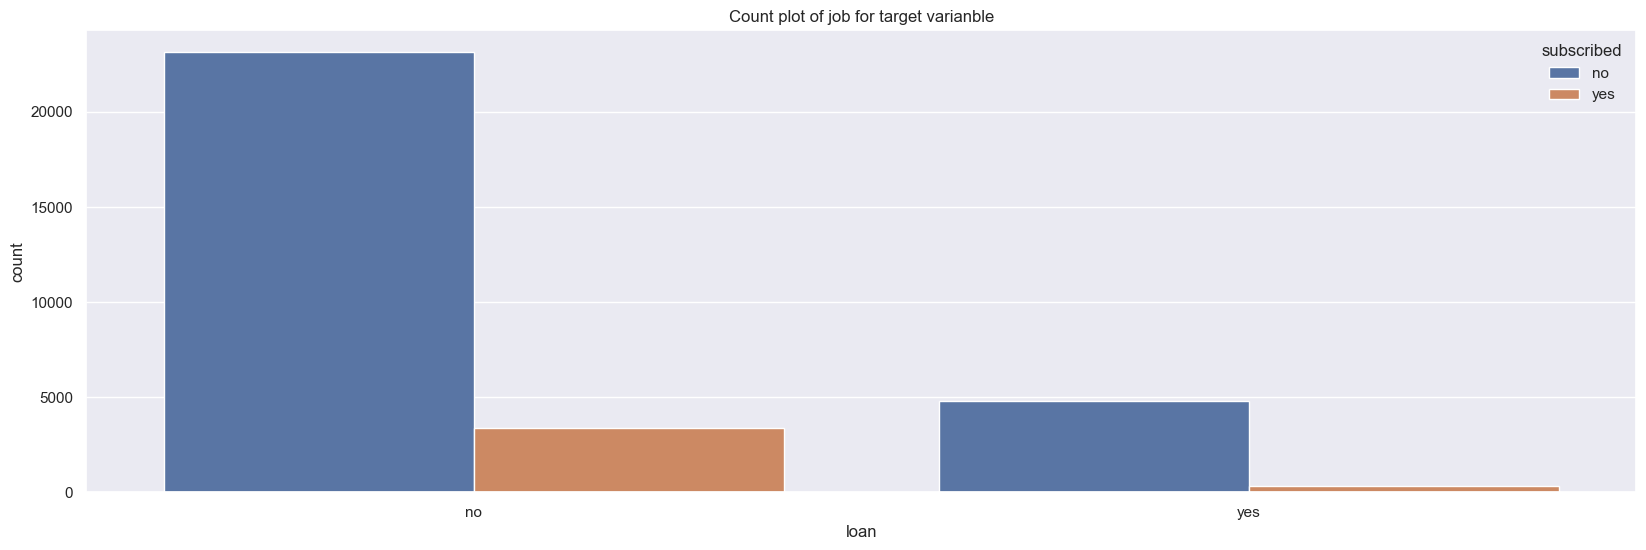

In [408]:
sns.countplot(x=bank['loan'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Contact

In [409]:
bank.contact.value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

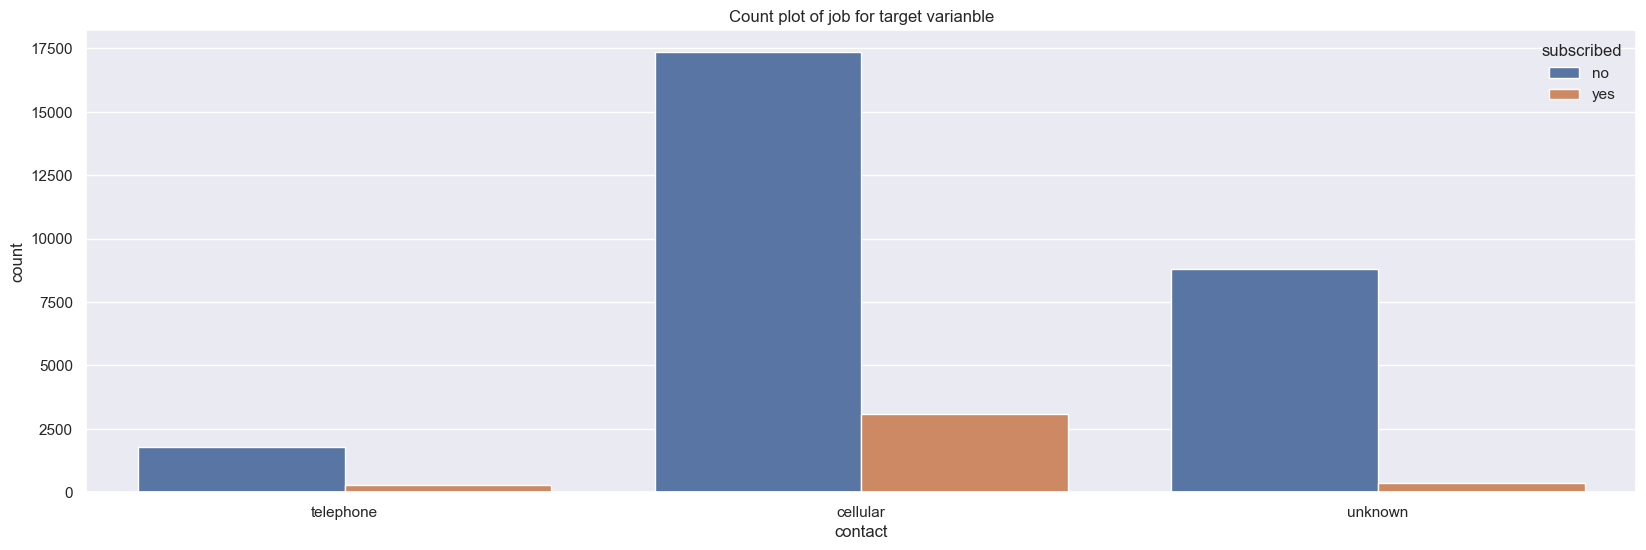

In [410]:
sns.countplot(x=bank['contact'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Month

In [411]:
bank.month.value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

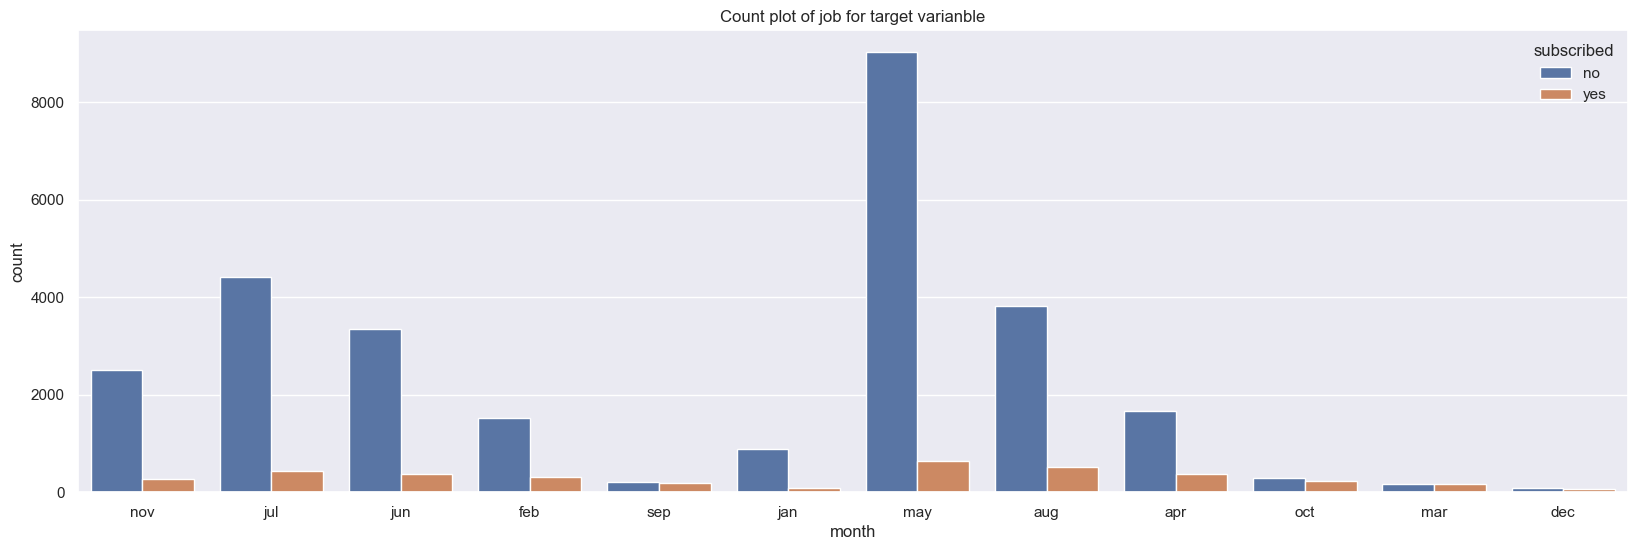

In [412]:
sns.countplot(x=bank['month'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

In [413]:
bank[bank['month']== 'jan'].subscribed.value_counts()

no     880
yes     97
Name: subscribed, dtype: int64

# Pairplot

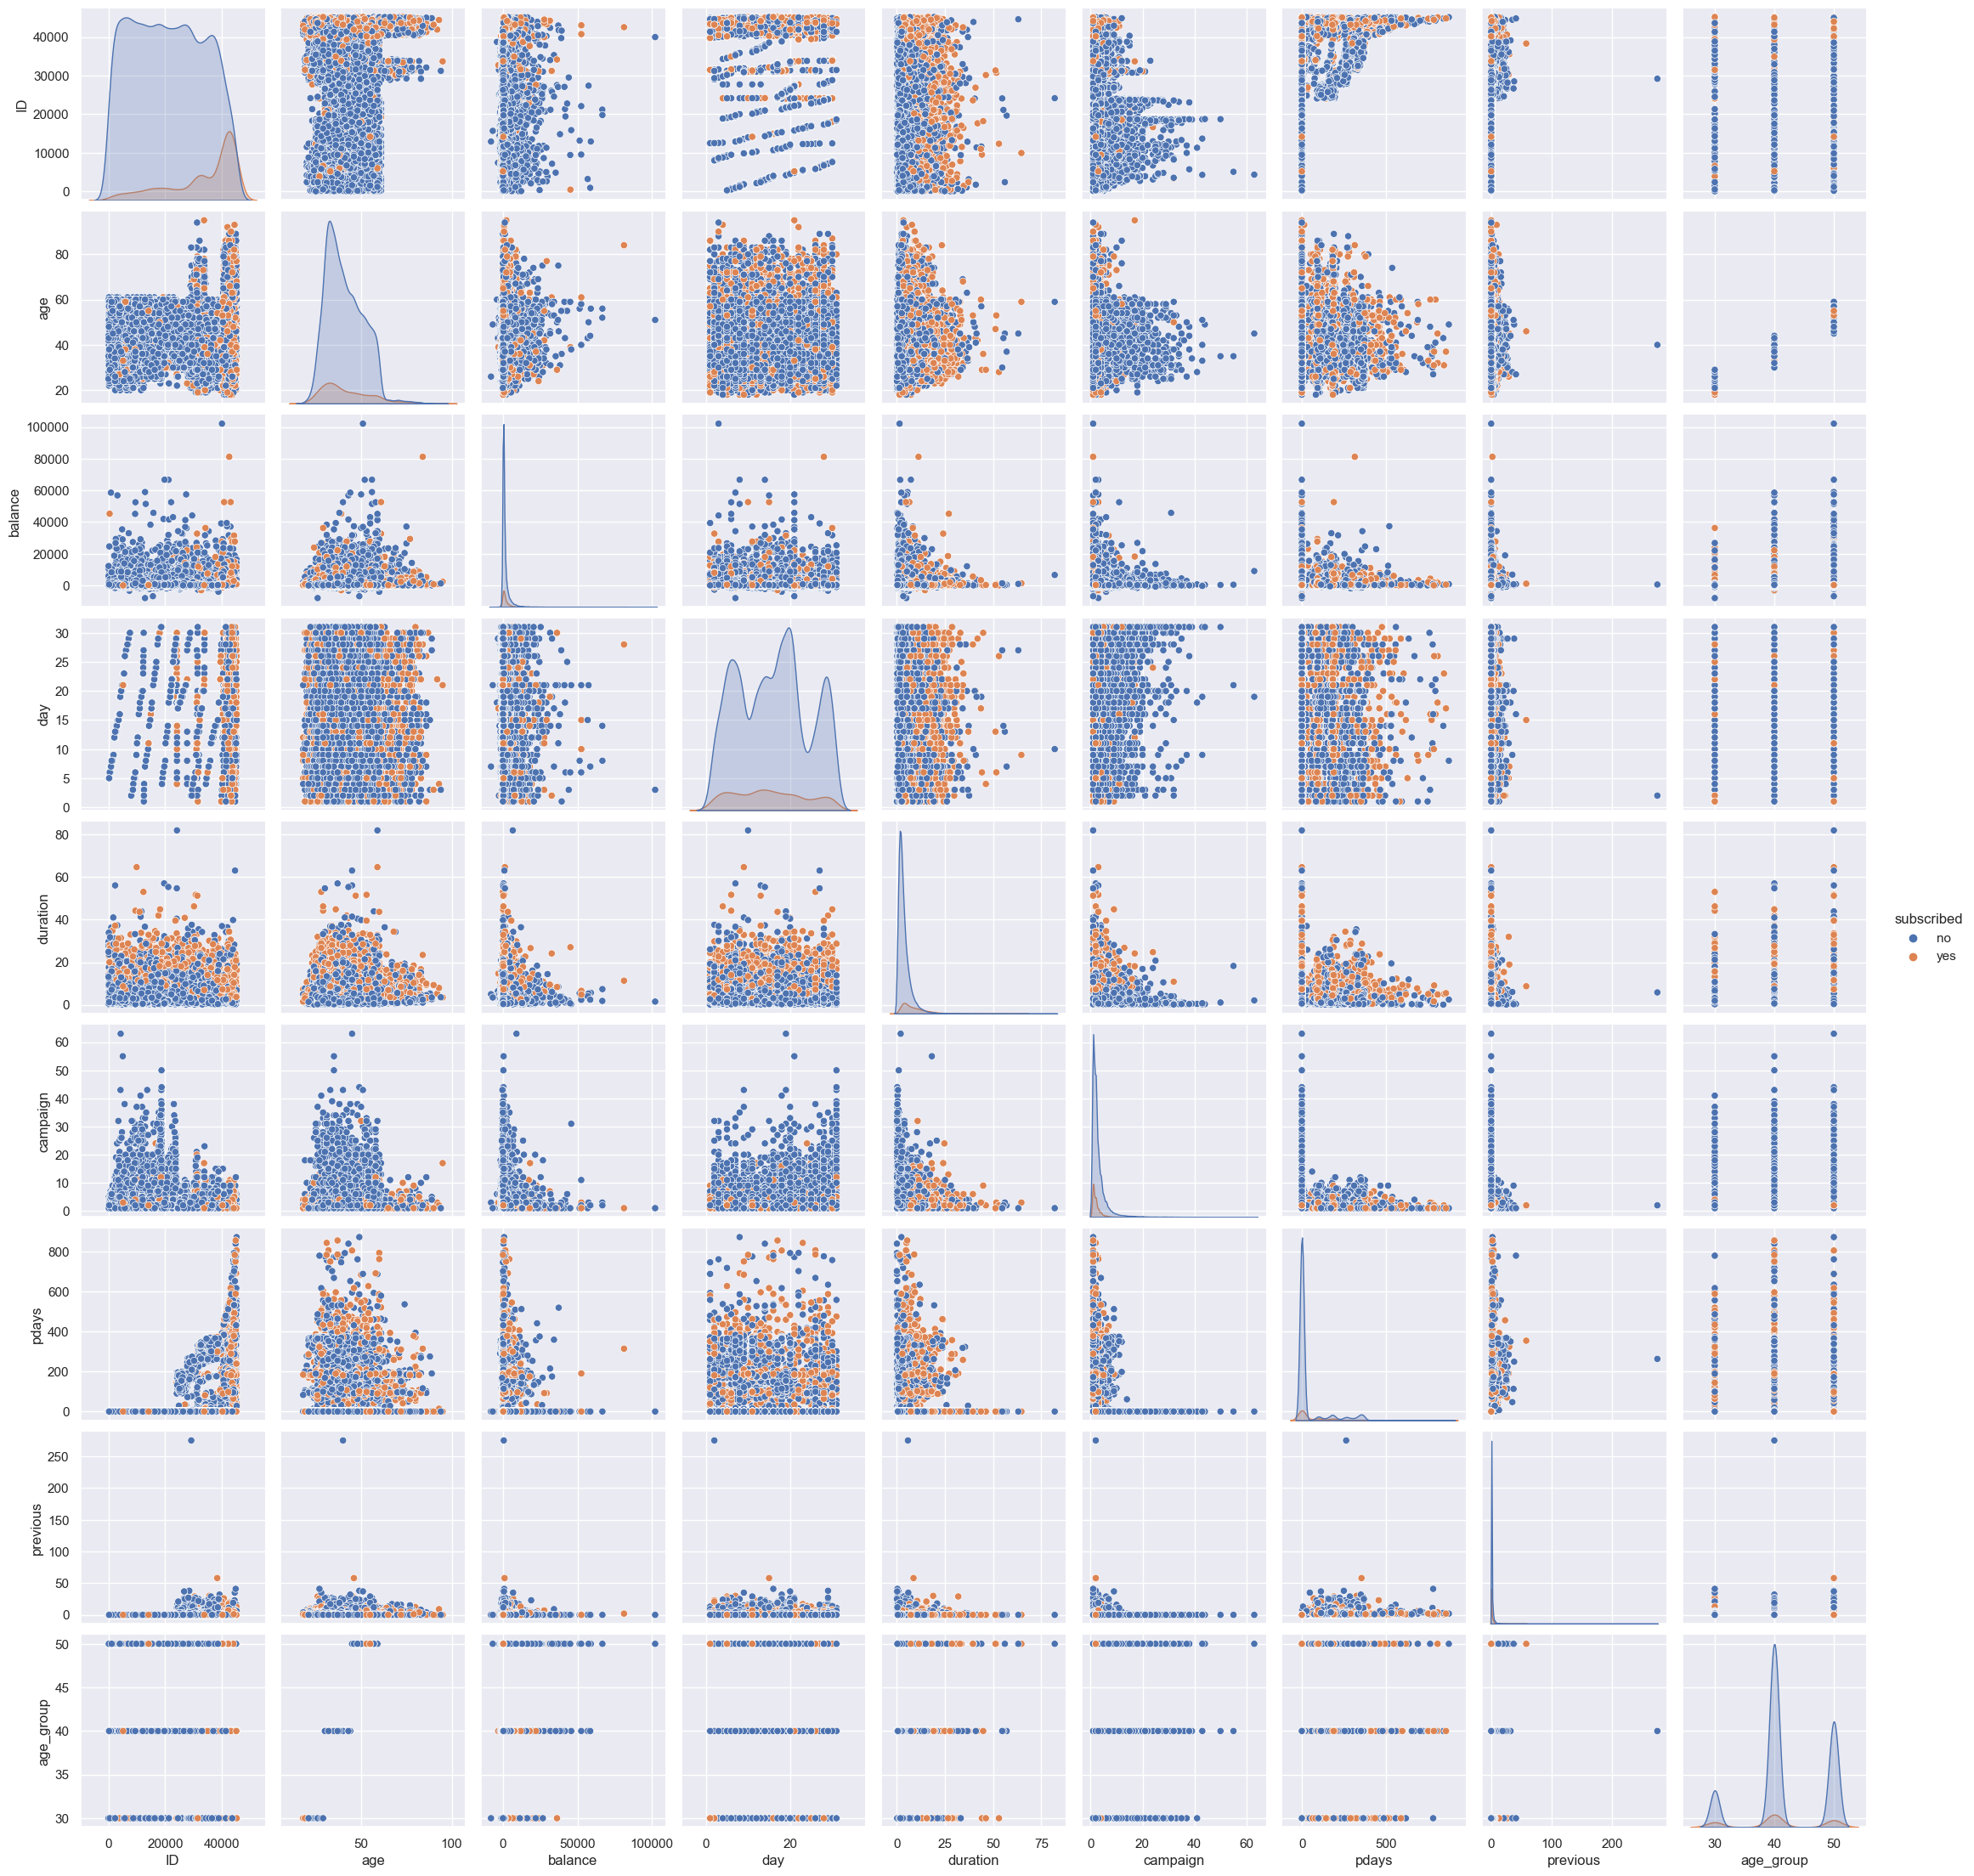

In [414]:
#data.drop('age_group, axis=1, inplace=True')
sns.pairplot(bank, hue = 'subscribed')

# Correlation matrix of numerical features

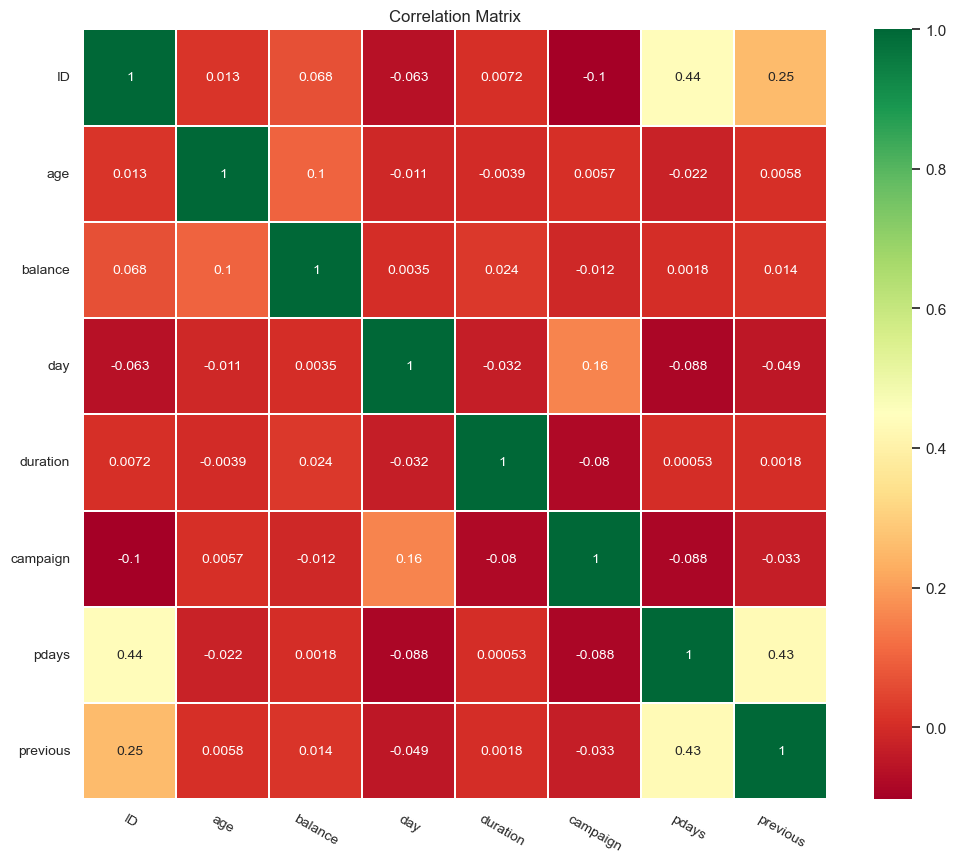

In [415]:
corr_bank = bank[numerical +['subscribed']]
corr = corr_bank.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


Outlier detection for numerical attributes using IQR


In [416]:
bank_numerical = bank[numerical]
print('Shape of numerical dataframe{}'.format(bank_numerical.shape))
bank_numerical.head()

Shape of numerical dataframe(31647, 8)


,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,0.733333,2,-1,0
1,40576,31,3,20,1.516667,2,-1,0
2,15320,27,891,18,4.000000,1,-1,0
3,43962,57,3287,22,14.450000,1,84,3
4,29842,31,119,4,6.333333,1,-1,0


In [417]:
q3 = bank_numerical.quantile(0.75)
q1 = bank_numerical.quantile(0.75)
iqr = q3-q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
ID          0.0
age         0.0
balance     0.0
day         0.0
duration    0.0
campaign    0.0
pdays       0.0
previous    0.0
Name: 0.75, dtype: float64


In [418]:
bank.shape

(31647, 19)

# Train Test split

In [419]:
bank.replace(to_replace={'subscribed':'yes'},value=1, inplace=True)
bank.replace(to_replace={'subscribed':'no'},value=0, inplace=True)

In [420]:
bank.replace(to_replace={'loan':'yes'},value=1, inplace=True)
bank.replace(to_replace={'loan':'no'},value=0, inplace=True)

In [421]:
bank.replace(to_replace={'default':'yes'},value=1, inplace=True)
bank.replace(to_replace={'default':'no'},value=0, inplace=True)

In [422]:
bank.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,26110,56,admin.,married,unknown,0,1933,no,0,telephone,19,nov,0.733333,2,-1,0,unknown,0,50.0
1,40576,31,unknown,married,secondary,0,3,no,0,cellular,20,jul,1.516667,2,-1,0,unknown,0,40.0
2,15320,27,services,married,secondary,0,891,yes,0,cellular,18,jul,4.000000,1,-1,0,unknown,0,30.0
3,43962,57,management,divorced,tertiary,0,3287,no,0,cellular,22,jun,14.450000,1,84,3,success,1,50.0
4,29842,31,technician,married,secondary,0,119,yes,0,cellular,4,feb,6.333333,1,-1,0,unknown,0,40.0


In [423]:
data1 = bank.copy()
data1['job'] = data1['job'].astype('category').cat.codes
data1['marital'] = data1['marital'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
data1['default'] = data1['default'].astype('category').cat.codes
data1['loan'] = data1['loan'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes

In [424]:
y = bank['subscribed']
x_train, x_test, y_train, y_test = train_test_split(bank.drop(['subscribed'],axis =1), y, test_size=0.20, random_state=42)

In [425]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (25317, 18) (25317,)
Test data shape (6330, 18) (6330,)


# LabelEncoder

In [426]:
y = bank['subscribed']

In [427]:
bank.drop(['subscribed'], axis =1, inplace=True)

In [428]:
bank.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_group
0,26110,56,admin.,married,unknown,0,1933,no,0,telephone,19,nov,0.733333,2,-1,0,unknown,50.0
1,40576,31,unknown,married,secondary,0,3,no,0,cellular,20,jul,1.516667,2,-1,0,unknown,40.0
2,15320,27,services,married,secondary,0,891,yes,0,cellular,18,jul,4.000000,1,-1,0,unknown,30.0
3,43962,57,management,divorced,tertiary,0,3287,no,0,cellular,22,jun,14.450000,1,84,3,success,50.0
4,29842,31,technician,married,secondary,0,119,yes,0,cellular,4,feb,6.333333,1,-1,0,unknown,40.0


In [431]:
bank.shape

(31647, 18)

In [432]:
y.head(5)

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int64

In [433]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(bank, y, test_size=0.2, random_state=0)
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [434]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(le_x_train.shape,le_x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(le_y_train.shape,le_y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(le_x_cv.shape,le_y_cv.shape))
  

the shape of x_train data,(20253, 18) and shape of x_test data (6330, 18):
the shape of y_train data,(20253,) and shape of y_test data (6330,):
the shape of x_cv data,(5064, 18) and shape of y_cv data (5064,):


In [435]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [436]:
le.fit(bank['job'])

LabelEncoder()

In [437]:
x_train.job = le.transform(x_train.job)
x_test.job = le.transform(x_test.job)
x_cv.job = le.transform(x_cv.job)

In [438]:
le = LabelEncoder()
le.fit(bank['marital'])
x_train.marital = le.transform(x_train.marital)
x_test.marital = le.transform(x_test.marital)
x_cv.marital = le.transform(x_cv.marital)

In [439]:
le = LabelEncoder()
le.fit(bank['education'])
x_train.education = le.transform(x_train.education)
x_test.education = le.transform(x_test.education)
x_cv.education = le.transform(x_cv.education)

In [440]:
le = LabelEncoder()
le.fit(bank['housing'])
x_train.housing = le.transform(x_train.housing)
x_test.housing = le.transform(x_test.housing)
x_cv.housing = le.transform(x_cv.housing)

In [441]:
import warnings
warnings.filterwarnings("ignore")

In [442]:
le = LabelEncoder()
le.fit(bank['loan'])
x_train.loan = le.transform(x_train.loan)
x_test.loan = le.transform(x_test.loan)
x_cv.loan = le.transform(x_cv.loan)

In [443]:
le = LabelEncoder()
le.fit(bank['poutcome'])
x_train.poutcome = le.transform(x_train.poutcome)
x_test.poutcome = le.transform(x_test.poutcome)
x_cv.poutcome = le.transform(x_cv.poutcome)

# Machine Learning Models

In [445]:
score = {}

Logistic Regression

In [451]:
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

ValueError: could not convert string to float: 'cellular'

# Training Logistic Regression with best hyperparameters

In [453]:
from sklearn.metrics import log_loss

model = LogisticRegression(C=3, class_weight='balanced', n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

ValueError: could not convert string to float: 'cellular'

# Train Confusin matrix

In [459]:
from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

NameError: name 'y_predicted_train' is not defined

In [460]:
#I am trying our best fermonace